## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Import Dataset

In [3]:
# Read the data
df=pd.read_csv('C:\\Users\\Hpp\Desktop\\Fake news Detection\\news.csv')

In [4]:
# Shape of data
df.shape

(6335, 4)

In [5]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
df.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

In [24]:
df.corr()

,Unnamed: 0
Unnamed: 0,1.0


In [7]:
# Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

## Visualization

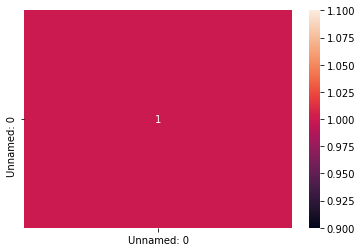

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

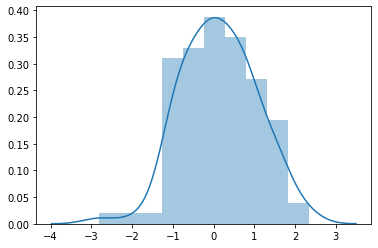

In [10]:
v = np.random.normal(size=100)
sns.distplot(v);

In [17]:
r=df.label.value_counts()

In [18]:
r

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [22]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2a4faa3508>,
 [Text(-0.002117495380441447, 1.2199981623811218, 'FAKE'),
  Text(0.002395199692630014, -1.3799979213819247, 'REAL')],
 [Text(-0.00124966940485069, 0.7199989155036127, '50.06%'),
  Text(0.001527373717039429, -0.8799986745044157, '49.94%')])

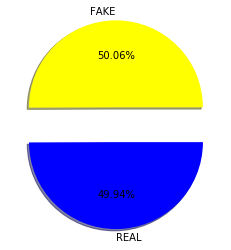

In [23]:
labels=['FAKE','REAL']
size=[3171,3164]
colors = ["yellow", "blue"]
explode = (0.12,0.28)
plt.pie(size,labels=labels,explode=explode,colors=colors,autopct='%1.2f%%',shadow=True)

## Split the dataset into training and testing sets

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [12]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [13]:
# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [14]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

C:\Users\Hpp\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=50, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
# Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [16]:
# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[589,  49],
       [ 43, 586]], dtype=int64)